In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
dataset = pd.read_csv(r"D:\Machine Learning\ML Algorithms\Datasets\Housing.csv")
dataset.head(3)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,0,0,0,1,2,1,furnished,13300000
1,8960,4,4,4,1,0,0,0,1,3,0,furnished,12250000
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,12250000


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
dataset["furnishingstatus_Label"] = le.fit_transform(dataset['furnishingstatus'])
dataset.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,furnishingstatus_Label
0,7420,4,2,3,1,0,0,0,1,2,1,furnished,13300000,0
1,8960,4,4,4,1,0,0,0,1,3,0,furnished,12250000,0
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,12250000,1
3,7500,4,2,2,1,0,1,0,1,3,1,furnished,12215000,0
4,7420,4,1,2,1,1,1,0,1,2,0,furnished,11410000,0


In [5]:
dataset.drop(['furnishingstatus'],axis=1,inplace=True)

In [6]:
dataset.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnishingstatus_Label
0,7420,4,2,3,1,0,0,0,1,2,1,13300000,0
1,8960,4,4,4,1,0,0,0,1,3,0,12250000,0
2,9960,3,2,2,1,0,1,0,0,2,1,12250000,1
3,7500,4,2,2,1,0,1,0,1,3,1,12215000,0
4,7420,4,1,2,1,1,1,0,1,2,0,11410000,0


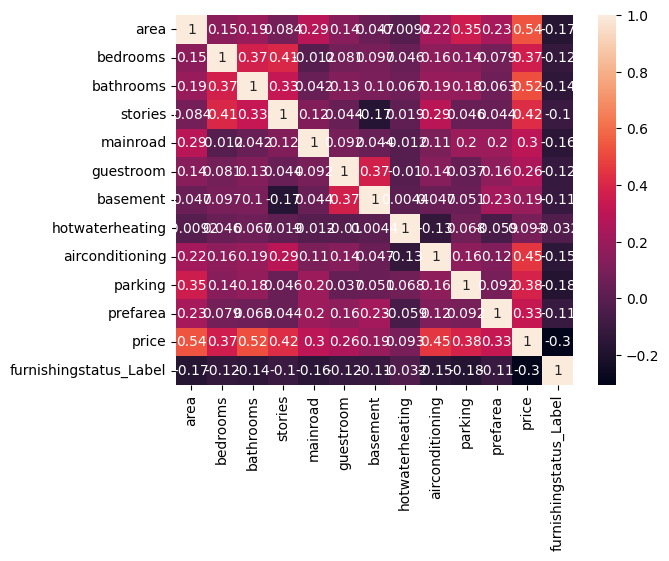

In [7]:
sns.heatmap(data=dataset.corr(),annot=True)
plt.show

In [17]:
x = dataset.iloc[:,:-2]
x['furnishingstatus_Label'] = dataset['furnishingstatus_Label']
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_Label
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [15]:
y = dataset['price']

In [60]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)
x.head(3)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_Label
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

LinearRegression


In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [23]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
lr.score(x_test,y_test)*100

64.94754192267794

In [26]:
lr.coef_

array([ 511355.31486431,   57939.76418471,  550762.10873532,
        352072.08634443,  127770.25363585,   89178.0079421 ,
        187581.88438844,  143909.24149324,  365086.93393877,
        194330.06533066,  267023.36435044, -160043.58443798])

In [43]:
mean_squared_error(y_test,lr.predict(x_test))

1771751116594.0398

In [45]:
mean_absolute_error(y_test,lr.predict(x_test))

979679.6912959907

In [46]:
np.sqrt(mean_squared_error(y_test,lr.predict(x_test)))

1331071.4167895124

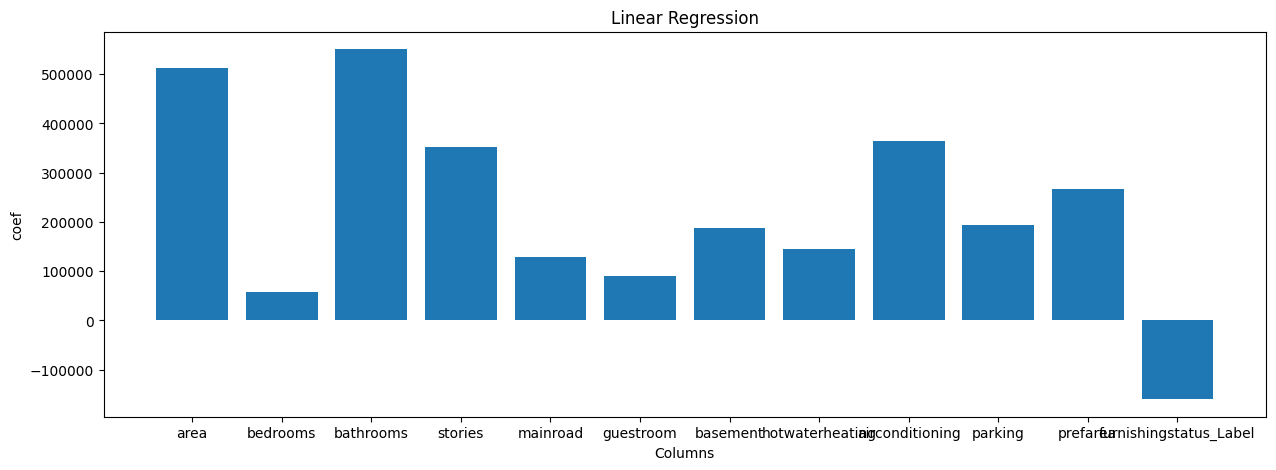

In [28]:
#plotting coef on bar
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title("Linear Regression")
plt.xlabel("Columns")
plt.ylabel("coef")
plt.show()

<h1>Lasso<h1>

In [29]:
la = Lasso(alpha=0.5)
la.fit(x_train,y_train)

Lasso(alpha=0.5)

In [33]:
la.score(x_train,y_train)*100

68.54429472839587

In [52]:
mean_squared_error(y_test,la.predict(x_test))

1771751969850.9707

In [53]:
mean_absolute_error(y_test,la.predict(x_test))

979679.843205266

In [54]:
np.sqrt(mean_squared_error(y_test,la.predict(x_test)))

1331071.7373045566

<h1>Ridge<h1>

In [37]:
ri = Ridge(alpha=0.5)
ri.fit(x_train,y_train)

Ridge(alpha=0.5)

In [39]:
ri.score(x_test,y_test)*100

64.94252780938318

In [56]:
mean_squared_error(y_test,ri.predict(x_test))

1772004558472.7556

In [57]:
mean_absolute_error(y_test,ri.predict(x_test))

979593.6815650746

In [58]:
np.sqrt(mean_squared_error(y_test,ri.predict(x_test)))

1331166.6155942897

<H1>Comparing coeffecient<h1>

In [59]:
df_coeff = pd.DataFrame({"Columns":x.columns,"LinearRegression":lr.coef_,"Ridge":ri.coef_,"Lasso":la.coef_})
df_coeff

,Columns,LinearRegression,Ridge,Lasso
0,area,511355.314864,510869.216419,511355.224200
1,bedrooms,57939.764185,58390.339900,57939.673014
2,bathrooms,550762.108735,550147.554301,550761.970198
3,stories,352072.086344,351680.979279,352071.776455
4,mainroad,127770.253636,127895.651370,127770.062479
5,guestroom,89178.007942,89356.538872,89177.862545
6,basement,187581.884388,187312.418538,187581.577520
7,hotwaterheating,143909.241493,143748.101025,143908.763080
8,airconditioning,365086.933939,364894.509065,365086.739179
9,parking,194330.065331,194389.865711,194329.840942
